## Auswertung F47 Penning trap

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [16]:
# For calculation of the theoretical values during the execution:

a=1.7588e11 # ration mass/charge electron [C /kg]
C2=1.4e4    # m-2
u0=1.257e-6 # N / A^2
N= 2400     # windungszahl
L=0.246      # length coil m

def func(I, U): 
    B=u0*N*I/L
    v_c=a*B/(2*np.pi)         # free cycloton frequency
    v_z=1/(2*np.pi)*np.sqrt(a*2*C2*U)   # axial frequency
    v_minus=1/2*(v_c-np.sqrt(v_c**2-2*v_z**2))   # magnetron frequency
    v_plus=1/2*(v_c+np.sqrt(v_c**2-2*v_z**2))   # modified cyclotron frequency

    print('free cyclotron frequency v_c:', v_c/10**6, 'MHz')
    print('axial frequency v_z:', v_z/10**6, 'MHz')
    print('magnetron frequency v-:', v_minus/10**6, 'MHz')
    print('modified cyclotron frequency v+:', v_plus/10**6, 'MHz')

func(1.3, 50.5)

free cyclotron frequency v_c: 446.26348556133934 MHz
axial frequency v_z: 79.36939408160792 MHz
magnetron frequency v-: 7.17335725721252 MHz
modified cyclotron frequency v+: 439.0901283041268 MHz


### 1. Modified cyclotron frequency $\nu _+$ and magneton frequency $\nu _-$

The eigenfrequencies are calculated using the following equations:

$$
\omega_+ = \frac{1}{2} \left( \omega_c + \sqrt{\omega_c^2 - 2\omega_z^2} \right)
$$

$$
\omega_- = \frac{1}{2} \left( \omega_c - \sqrt{\omega_c^2 - 2\omega_z^2} \right)
$$

Here, $\omega_+$ represents the highest frequency of the three modes and primarily governs the rapid circular motion of the particle around the center of the trap. In contrast, $\omega_-$ is the lowest frequency and is associated with a slow outward spiral motion of the particle’s orbit in the radial plane.

In our experiment, we focused on the time frequencies $\nu_z$, $\nu_+$, and $\nu_-$. For $\nu_-$, we measured its minimum by using the maximum current and minimal voltage, and its maximum by the opposite settings. This is because $\nu_-$ does not vary significantly within our ranges of current and voltage. After conducting two measurements, we determined the range of $\nu_- \in [5.5 \pm 0.2, 7.0 \pm 0.1] \, \text{Hz}$. Since $\nu_+$ is very high, we observed and identified it by continuously varying the current and voltage.


### 2. Determination of the free cyclotron frequency

There are two formulas to calculate the free cyclotron frequency, the sideband relation

$$ \omega _c = \omega _+ + \omega _-$$

and the invariance-relation, which is independent against the trap imperfections about the misalignment between $\vec{B}$ and $\vec{E}$

$$
\omega_c^2 = \omega_+^2 + \omega_-^2 + \omega_z^2
$$


In [17]:
def wc(U, I, w_z, dw_z, w_plus, dw_plus, w_minus, dw_minus):
    print('U=', U, 'V,', 'I=', I, 'A:')
    print(f'wc_side= {w_plus+w_minus:.2f} +- {np.sqrt(dw_minus**2 + dw_plus**2):.2f} MHz') # sideband relation and its error
    wc_invariance=np.sqrt(w_plus**2+w_minus**2+w_z**2) # invariance relation
    dwc_invariance=np.sqrt((w_plus/wc_invariance*dw_plus)**2+(w_minus/wc_invariance*dw_minus)**2+(w_z/wc_invariance*dw_z)**2)
    print(f'wc_invariance= {wc_invariance:.2f} +- {dwc_invariance:.2f} MHz')

# Error calculated using Gauss-Error Propagation

wc(48, 1.34, 78.1, 0.1, 451.0, 0.5, 5.5, 0.2)
print()
wc(50.5, 1.1, 78.4, 0.5, 367, 1, 7, 0.1)
print()
wc(50.5, 1.2, 79, 1, 402, 2, 6.8, 0.1)
print()
wc(50.5, 1.3, 75, 1, 438.5, 0.5, 5.9, 0.2)
print()
wc(50.5, 1.34, 78.4, 0.5, 452, 1, 5.7, 0.5)
print()
wc(49.9, 1.34, 76.3, 0.5, 451.3, 0.5, 5.6, 0.2)
print()
wc(49.3, 1.34, 75.6, 0.5, 451, 0.5, 5.55, 0.1)

U= 48 V, I= 1.34 A:
wc_side= 456.50 +- 0.54 MHz
wc_invariance= 457.75 +- 0.49 MHz

U= 50.5 V, I= 1.1 A:
wc_side= 374.00 +- 1.00 MHz
wc_invariance= 375.35 +- 0.98 MHz

U= 50.5 V, I= 1.2 A:
wc_side= 408.80 +- 2.00 MHz
wc_invariance= 409.75 +- 1.97 MHz

U= 50.5 V, I= 1.3 A:
wc_side= 444.40 +- 0.54 MHz
wc_invariance= 444.91 +- 0.52 MHz

U= 50.5 V, I= 1.34 A:
wc_side= 457.70 +- 1.12 MHz
wc_invariance= 458.78 +- 0.99 MHz

U= 49.9 V, I= 1.34 A:
wc_side= 456.90 +- 0.54 MHz
wc_invariance= 457.74 +- 0.50 MHz

U= 49.3 V, I= 1.34 A:
wc_side= 456.55 +- 0.51 MHz
wc_invariance= 457.33 +- 0.50 MHz


In [18]:
wc(48, 1.34, 73.3, 0.5, 451, 0.5, 5.5, 0.1)

U= 48 V, I= 1.34 A:
wc_side= 456.50 +- 0.51 MHz
wc_invariance= 456.95 +- 0.50 MHz


Obtaining the values above we can define the error deviation between the theoretical value and the experimental value.

For I=1.34A, U=48V: $\Delta_{side}=1.2\sigma$, $\Delta_{invariance}=0.6\sigma$

For I=1.1, U=50.5V: $\Delta_{side}=0.7\sigma$, $\Delta_{invariance}=0.25\sigma$

For I=1.2A, U=50.5V: $\Delta_{side}=0.53\sigma$, $\Delta_{invariance}=0.11\sigma$

For I=1.3A, U=50.5V: $\Delta_{side}=0.52\sigma$, $\Delta_{invariance}=0.07\sigma$

For I=1.34A, U=50.5V: $\Delta_{side}=0.86\sigma$, $\Delta_{invariance}=0.16\sigma$

For I=1.34A, U=49.9V: $\Delta_{side}=2.17\sigma$, $\Delta_{invariance}=1.43\sigma$

For I=1.34A, U=49.3V: $\Delta_{side}=1.33\sigma$, $\Delta_{invariance}=0.24\sigma$

For I=1.34A, U=48V: $\Delta_{side}=2.1\sigma$, $\Delta_{invariance}=1.05\sigma$

The invariance-relation is independent against trap imperfections (Misalignment between $\vec{B}$ and $\vec{E}$), thus it provides a better result as it estimated by sideband relation. Additionally, it can be observed that the value derived from the Invariance Theorem has a significantly smaller error. Systematic errors from $\omega_z$, $\omega_+$, and $\omega_-$ are present; however, they are partially canceled out by the combination of the three frequency components, calculations see [Brown and Gabrielse, 1982]. 

Considering the phase space we determined for trapping (all possible combinations of ring voltage and coil current, that enable trapping): $I\in (1.08, 1.34)\text{A}$, $U\in (47, 50.9)\text{V}$, the values that we measured in boundry have a much significanter deviation, which can be explained by the Instability near the boundry trapping condition.

### 3. Axial Frequency as a Function of Ring Voltage

We will use the formula below to calculate the theoretical values of axial frequencies:

$$ \nu_z = \frac{1}{2\pi}\sqrt{\frac{q}{m}2C_2V_0} $$

To maximize the signal strength, we have selected the maximal current 1,34 A to produce a stronger magnetic field.

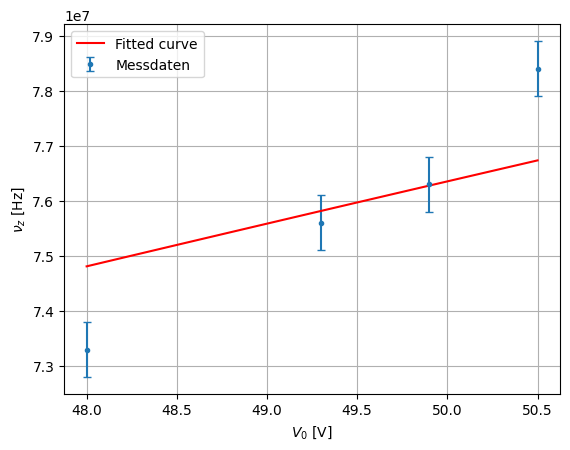

C_2 = 13085.907041767732 +/- 224.86150307172662 m^-2


In [19]:
V_0 = np.array([50.5, 49.9, 49.3, 48])
nu_z = np.array([78.4, 76.3, 75.6, 73.3])*10**6   #MHz convert to Hz
nu_z_err = np.array([0.5, 0.5, 0.5, 0.5])*10**6
qm = 1.7588e11

plt.errorbar(V_0, nu_z, yerr=nu_z_err, capsize=3, marker='.', linestyle='None', label='Messdaten')

def theo_nu_z(V, c2):
    return 1/(2*np.pi)*np.sqrt(qm*2*c2*V)

popt, pcov = curve_fit(theo_nu_z, V_0, nu_z, sigma=nu_z_err, p0 = 2)
V_0_fit = np.linspace(48, 50.5, 100)
nu_z_fit = theo_nu_z(V_0_fit, *popt)

plt.plot(V_0_fit, nu_z_fit, 'r-', label='Fitted curve')
plt.xlabel('$V_0$ [V]')
plt.ylabel('$\\nu_z$ [Hz]')
plt.legend()
plt.grid(True)
plt.show()

print("C_2 =", popt[0], "+/-", pcov[0,0]**0.5, 'm^-2')

Our value for $C_2 = (1,3086 \pm 0,0225) \cdot 10^{4} m^{-2}$. When compared to the theoretical value from the script, $1,4 \cdot 10^4$, we observe a deviation of 4.06 $\sigma$. This indicates that our measured value significantly differs from the theoretical value.

During the experiment, accurately identifying the axial frequency proved challenging. We were unable to completely identify the dip signal, and even had to utilize a signal generator amplitude of 15 dBm. High excitation amplitudes can impart excessive energy to the electrons in the trap, causing them to oscillate with such large amplitudes that they collide with the trap electrodes and are lost, leading to the disappearance of the dip signal. Additionally, at higher amplitudes, the response of the trapped particles may also become non-linear, distorting the expected dip signal or causing it to merge with noise, making it difficult to accurately identify the eigenfrequencies.

### 4. Free cyclotron frequencies as function of the coil current

In this part we will consider the linear relation between $\omega _c$ and the coil current $I$, the free cyclotron frequencies are obtained from the calculation of the invariance theorem.

Theoretically the free cyclotron frequency is evaluated by
$$
\nu _c = \frac{1}{2\pi}\frac{q}{m}B
$$,

where q/m is the mass ratio of electron, B is the intensity of magetic field. By using this formula we can get the experimental value of the mass ratio of the electron.

For B we use the formula of a long solenoid
$$ 
B = \frac{\mu_0 N I}{l}
$$

where $l$, $\mu_0$ and N represent the length of the solenoid, number of windings and the vacuum permeability respectively. So we get the relation between current and $\nu_c$:
$$
\nu _c = \frac{1}{2\pi}\frac{q}{m}\frac{\mu_0 N }{l} \cdot I := k\cdot I
$$

The mass ratio is obtained as 
$$
\frac{q}{m} = \frac{2\pi l k}{\mu_0 N}
$$

and its error from the error propagation
$$
\Delta(\frac{q}{m}) = \frac{q}{m}\sqrt{(\frac{\Delta l}{l})^2 + (\frac{\Delta N}{N})^2 + (\frac{\Delta k}{k})^2}
$$


k= 342102898.33917904 +- 216736.10364626348
q/m = ( 1.7528 +- 0.0222 ) x 10^11 C/kg


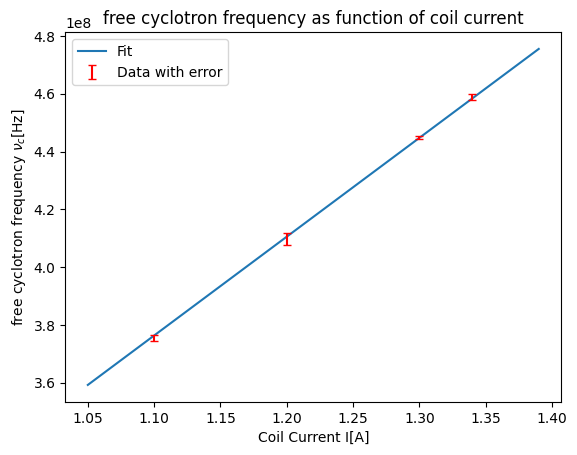

In [20]:
# V0=50.5V
v_c=np.array([375.35, 409.75, 444.91, 458.78])*10**6    # Hz
dv_c=np.array([0.98, 1.97, 0.52, 0.99])*10**6
I=np.array([1.1, 1.2, 1.3, 1.34])  # A

def linear(x, a):
    return a*x

popt, pcov=curve_fit(linear, I, v_c, sigma=dv_c)

print('k=', popt[0], '+-', pcov[0][0]**0.5)

x_range=np.linspace(np.min(I)-0.05, np.max(I)+0.05, 100)
plt.plot(x_range,linear(x_range,*popt), label='Fit')
plt.errorbar(I,v_c, yerr=dv_c, fmt='None', ecolor='r', capsize=3, marker='s', mec='black', mfc='black', ms='2', label='Data with error')
plt.xlabel('Coil Current I[A]')
plt.ylabel('free cyclotron frequency $\\nu_c$[Hz]')
plt.title('free cyclotron frequency as function of coil current')

plt.legend()

# calculate the ratio of mass and charge
#a=1.7588e11 # ration mass/charge electron [C /kg]
u0=1.257e-6 # N / A^2
N= 2400     # windungszahl
dN = 30
L=0.246      # length coil m
dL = 5e-4

qm_exp = (2*np.pi*L*popt[0])/(u0*N) 
qm_exp_err = qm_exp*np.sqrt((dL/L)**2 + (dN/N)**2 + (pcov[0][0]**0.5/popt[0])**2) 
print(f'q/m = ( {qm_exp/(10**11):.4f} +- {qm_exp_err/(10**11):.4f} ) x 10^11 C/kg')

We compared our determined value with the literature value of $1.7588 \times 10^{11} \, \text{C/kg}$, yielding a sigma deviation of $0.27\sigma$. This indicates no significant difference between the two values. This agreement may be attributed to our use of free cyclotron frequencies derived from the invariance formula, which helps avoid many potential sources of error. Additionally, we can also expect that using the direct results from our experiment would also result in an insignificant sigma deviation, as we calculated earlier, because there is no significant difference between our measured free cyclotron frequencies.

### 5. Coupling modes

The split electrode can be used to resonantly drive (energize) the modes (mode referring to +, − and z) and couple different motions. Using specific excitation frequencies (integer multiple of either the sum or a difference of the frequencies of the two involved modes) a efficient energy transfer can be created: $\omega_{excitation}=n(\omega_z\pm\omega_+)$, $\omega_{excitation}=n(\omega_z\pm\omega_-)$, $\omega_{excitation}=n(\omega_-\pm\omega_+)$....

In Experiment we study this Coupling Algorithmus using a coil current I=1.34A and voltage U=48V:
| Frequency  | Theoretical Value [MeV] | Measurement [MeV] | Amplitude [dBm] |
|------------|-------------------------|-------------------|-----------------|
| $\nu_+ - \nu_z$    | 476                     | $470 ± 0.5$         | 0               |
| $\nu_z + \nu_-$    | 83                      | $68 ± 1$            | -10             |
| $2(\nu_z + \nu_-)$ | 166                     | $135 ± 1$           | -10             |

Despite the deviation, the two values agree well with each other. The error lies in the fact that we did not properly set the excitation amplitude at the beginning, causing the dip signal to disappear only at higher (or lower) excitation levels. Additionally, the experimentally determined values are all smaller than the theoretical predictions because, in the real Penning trap, additional damping (e.g., interactions between particles) occurs, making resonance easier to achieve. 

Due to the cylindrically symmetric electric field imperfections (high non-linear term such as z^3...) the z-oscillation of the trapped particles will behave like a spring that becomes 'stiffer' or 'weaker,' depending on the sign of the term. Consequently, the axial frequency varies therefor with the amplitude.

### 6. Electron lifetime measurement 

The signal amplitude/ dip-depth is a measure for the number of electrons in the trap, which drops exponentially with time. Without any RF-excitations, the waiting time between loading and detection are  changed and a measurement series for waiting time vs. signal amplitude is taken as below:

In [21]:
time, amplitude, d_amplitude = np.loadtxt('C:\\Users\\shiy0\\OneDrive\\Dokumente\\FP\\F 47 Cyclotron frequency in a Penning trap\\FP47_Shi\\lifetime.txt', delimiter=',',unpack=True)

def decay(t, A, tau):
    return A*np.exp(-t/tau)

popt, pcov=curve_fit(decay, time, amplitude, sigma=d_amplitude, p0=(40, 250))
print('T=', popt[1], '+-', pcov[1][1])  # tau, lifetime of electron
print('A=', popt[0], '+-', pcov[0][0])

x_range=np.linspace(150, 710, 100)
plt.plot(x_range,decay(x_range,*popt), label='decay curve A*exp(-$\\tau$*t)')
plt.errorbar(time,amplitude, yerr=d_amplitude, fmt='None', ecolor='r', capsize=3, marker='s', mec='black', mfc='black', ms='2', label='Data with error')
plt.xlabel('waiting time')
plt.ylabel('signal amplitude')
plt.title('free cyclotron frequency as function of coil current')

plt.legend()

FileNotFoundError: C:\Users\shiy0\OneDrive\Dokumente\FP\F 47 Cyclotron frequency in a Penning trap\FP47_Shi\lifetime.txt not found.

Given that we only have the decay constant for signal amplitude, which is linearly related to the number of electrons, the exact relationship between them remains unknown. As a result, without determining this linear relation, we cannot evaluate the decay constant for the number of electrons, and therefore, the electron lifetime cannot be determined under the available experimental conditions.

### 7. Long-Term Measurement

Instead of using the frequencies obtained from Gaussian fitting, we used the frequencies recorded in the measurement protocol in previous tasks. This is because the quality of the fit is particularly poor in certain frequency ranges, as can be seen in the following diagrams.

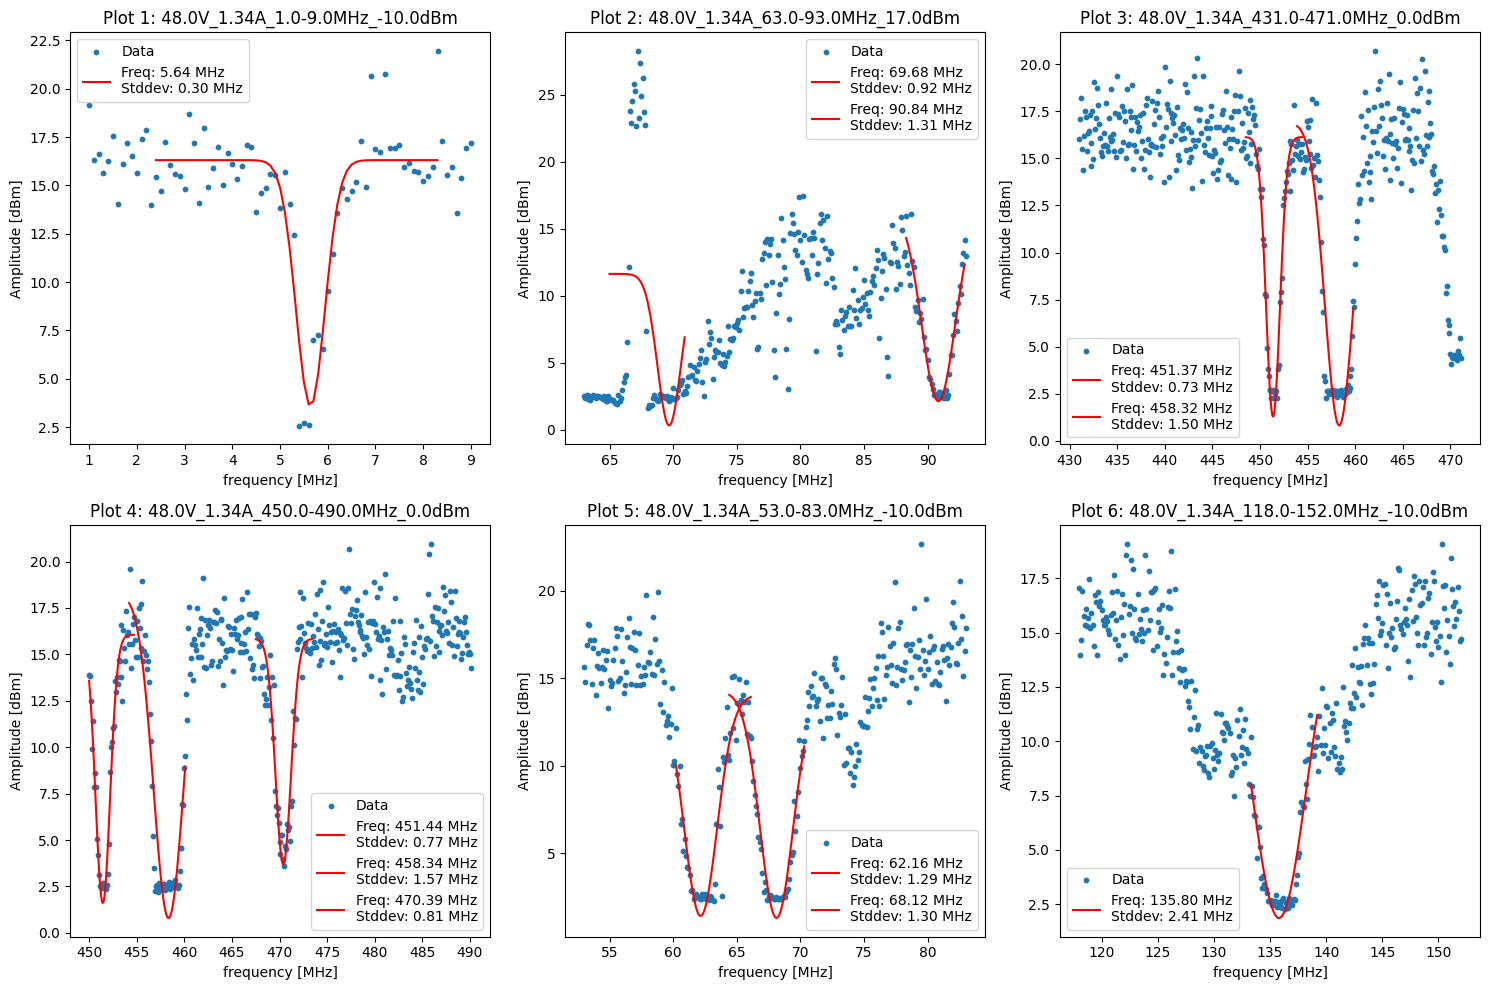

In [ ]:
import pandas as pd
import glob
import os
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

cols_in = [0, 1, 2]  # Coloum indices
col_names = ['frequency (MHz)', 'amplitude (dBm)', 'Error']

# Select all CSV files in our directory
files = glob.glob('C:\\Users\\shiy0\\OneDrive\\Dokumente\\FP\\F 47 Cyclotron frequency in a Penning trap\\FP47_Shi\\2024_08_27_17_07_37_FullRangeScan\\*.csv')

# first 5 CSVs, plotten in each rows 3
num_plots = 6
plots_per_row = 3

# Determine the number of rows needed
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 10))
axs = axs.flatten()  # Flatten in case we get a 2D array of axes

def gaussian(x, A, B, mean, stud):
    return A-B * np.exp(-((x - mean) ** 2) / (2 * stud ** 2))

for i, file in enumerate(files[:num_plots]):

    # Extract the file name from the full path
    filename = os.path.basename(file)
    title_part = filename[20:-4]

    # Read the CSV file using specified columns and names
    df = pd.read_csv(file, usecols=cols_in, names=col_names, header=None)

    # Invert the amplitude to find dips as peaks (position)
    inverted_amplitude = -df['amplitude (dBm)']
    peaks, _ = find_peaks(inverted_amplitude, prominence=10, width=3)
    # print(peaks)
    axs[i].scatter(df["frequency (MHz)"], df["amplitude (dBm)"], s=10, label='Data')

    # Fit a Gaussian to each peak ###############################################################################################

    freqs = df["frequency (MHz)"].values
    amplitudes = df["amplitude (dBm)"].values

    for peak in peaks:
        region = 30  # window size for fitting
        start = max(0, peak - region)
        end = min(len(freqs)-1, peak + region)
        peak_freqs = freqs[start:end]
        peak_amplitudes = amplitudes[start:end]

        popt, pcov = curve_fit(gaussian, peak_freqs, peak_amplitudes, p0=[15, 10, freqs[peak], 1])
        
        A, B, mean, stud = popt
        # Gauss curve plotten
        axs[i].plot(peak_freqs, gaussian(peak_freqs, *popt), color='red', label=f'Freq: {mean:.2f} MHz\nStddev: {stud:.2f} MHz')

    ##################################################################################################################################

    axs[i].set_xlabel("frequency [MHz]")
    axs[i].set_ylabel("Amplitude [dBm]")
    axs[i].set_title(f"Plot {i+1}: {title_part}")
    axs[i].legend()

# Remove empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

As an example, we have plotted only the first six CSV files (the number of plots can be adjusted by modifying the 'num_plots' parameter) and fitted them with a Gaussian curve. The different frequencies can be determined from the mean value and the error from its standard deviation. It is important to note that all frequencies match the measured values except for $\nu_z$ (Plot 2). The reason for this is that excitation below this frequency requires more energy, making it particularly difficult to identify a threshold for excitation. (As can be seen in Plot 2, the data are much less correlated with each other compared to the other plots.)